In [50]:
%matplotlib inline

import sys
import os
import random
import os
import numpy as np

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from collections import Counter 

from PIL import Image
from tqdm import tqdm

In [51]:
# directory pointing to all .npy files
input_directory = '../../data/FETAL/processed'

assert os.path.isdir(input_directory), "Couldn't find the dataset at {}".format(input_directory)

In [48]:
# Get the filenames in the input directory
filenames = os.listdir(input_directory)
filenames = [os.path.join(input_directory, f) for f in filenames if f.endswith('.npy')]

print("Found %s .npy files" % len(filenames))

Found 4633 .npy files


Found Non-Square Files:
../../data/FETAL/processed/0_1945.npy Dimension: (13, 66)
../../data/FETAL/processed/0_1193.npy Dimension: (25, 86)
../../data/FETAL/processed/0_0349.npy Dimension: (49, 86)
../../data/FETAL/processed/0_1753.npy Dimension: (61, 66)
../../data/FETAL/processed/0_3421.npy Dimension: (61, 86)
../../data/FETAL/processed/0_1346.npy Dimension: (49, 86)
../../data/FETAL/processed/0_1960.npy Dimension: (13, 66)
../../data/FETAL/processed/0_1449.npy Dimension: (25, 86)
../../data/FETAL/processed/0_2753.npy Dimension: (25, 66)
../../data/FETAL/processed/0_1200.npy Dimension: (61, 86)
../../data/FETAL/processed/0_2571.npy Dimension: (13, 66)
../../data/FETAL/processed/0_0651.npy Dimension: (25, 86)


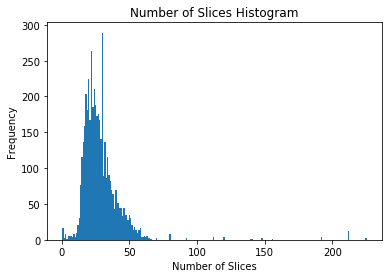

Most Frequent Values:
30 (with Frequency: 289)
22 (with Frequency: 264)
20 (with Frequency: 224)
24 (with Frequency: 211)
18 (with Frequency: 203)

Mean: 49.98717948717949
Standard Deviation: 46.40719815678012

25th Percentile: 20.25
50th Percentile: 39.5
75th Percentile: 58.75
90th Percentile: 114.39999999999998
95th Percentile: 149.19999999999993
99th Percentile: 214.99000000000007


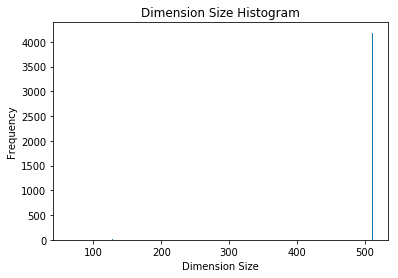

Most Frequent Values:
512 (with Frequency: 4184)
256 (with Frequency: 429)
128 (with Frequency: 7)
64 (with Frequency: 1)

Mean: 240.0
Standard Deviation: 171.58088471621772

25th Percentile: 112.0
50th Percentile: 192.0
75th Percentile: 320.0
90th Percentile: 435.20000000000005
95th Percentile: 473.5999999999999
99th Percentile: 504.31999999999994


In [49]:
def create_histogram_from_counter(counter, name, width=1.0, print_stats=True):
    labels, values = zip(*counter.items())
    
    # Plot Histogram
    plt.bar(labels, values, width=width)
    plt.title("%s Histogram" % name)
    plt.xlabel(name)
    plt.ylabel("Frequency")
    plt.show()
    
    # Print statistics
    if print_stats:
        print_statistics_from_counter(counter)
        
def print_statistics_from_counter(counter):
    modes = counter.most_common(5)
    mean = np.mean(list(counter.keys()))
    std = np.std(list(counter.keys()))
    first_perc = np.percentile(list(counter.keys()), 25)
    second_perc = np.percentile(list(counter.keys()), 50)
    third_perc = np.percentile(list(counter.keys()), 75)
    top10_perc = np.percentile(list(counter.keys()), 90)
    top5_perc = np.percentile(list(counter.keys()), 95)
    top1_perc = np.percentile(list(counter.keys()), 99)
    # var = np.var(counter.keys(), dtype=np.float64)
    
    print("Most Frequent Values:")
    for mode in modes:
        print("%s (with Frequency: %s)" % (mode[0], mode[1]))
    print("")
    print("Mean: %s" % mean)
    print("Standard Deviation: %s" % std)
    print("")
    print("25th Percentile: %s" % first_perc)
    print("50th Percentile: %s" % second_perc)
    print("75th Percentile: %s" % third_perc)
    print("90th Percentile: %s" % top10_perc)
    print("95th Percentile: %s" % top5_perc)
    print("99th Percentile: %s" % top1_perc)
    # print("Variance: %s" % var)
    
num_slices_counter = []
side_dim_counter = []
non_square_files = []
for filename in filenames:
    raw_matrix = np.load(filename)
    z_slices, width, height = raw_matrix.shape
    
    # Found a non-square shape
    if width != height:
        non_square_stat = filename + " Dimension: (%s, %s)" % (width, height)
        non_square_files.append(non_square_stat) 
    else:
        side_dim_counter.append(width)
    
    # Add the number of slices
    num_slices_counter.append(z_slices)

# Print out non-square files, one per line
print("Found Non-Square Files:")
print("\n".join(non_square_files))

# Print Histogram of Number of Slices
create_histogram_from_counter(Counter(num_slices_counter), "Number of Slices", print_stats=True)
create_histogram_from_counter(Counter(side_dim_counter), "Dimension Size", print_stats=True)